**Project: Time Series Analysis and Visualization of Air Passengers Dataset**

In this project, we will analyze and visualize the Air Passengers Dataset, which contains monthly totals of international airline passengers from 1949 to 1960. The goal is to understand the trends, seasonality, and patterns in the data using Python.

**Steps to Perform the Project**

**Step 1: Import Required Libraries**

We will use the following Python libraries:



*   pandas for data manipulation.
*   matplotlib and seaborn for data visualization.
*   statsmodels for time series analysis.


   





In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

**Step 2: Load the Dataset**

The Air Passengers dataset is available in many libraries, including statsmodels and seaborn. We will load it directly from seaborn.

In [2]:
# Load the dataset
data = sns.load_dataset('flights')
print(data.head())

   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121


**Step 3: Preprocess the Data**

Combine the year and month columns to create a proper datetime index.

Set the datetime column as the index for time series analysis.

In [3]:
# Convert year and month into a datetime object
data['date'] = pd.to_datetime(data['year'].astype(str) + '-' + data['month'].astype(str))

# Set the date column as the index
data.set_index('date', inplace=True)

# Drop the original year and month columns
data.drop(['year', 'month'], axis=1, inplace=True)

print(data.head())

            passengers
date                  
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


<ipython-input-3-10c72f3381dc>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['year'].astype(str) + '-' + data['month'].astype(str))


**Step 4: Visualize the Time Series Data**

Plot the time series data to observe trends and seasonality.

python


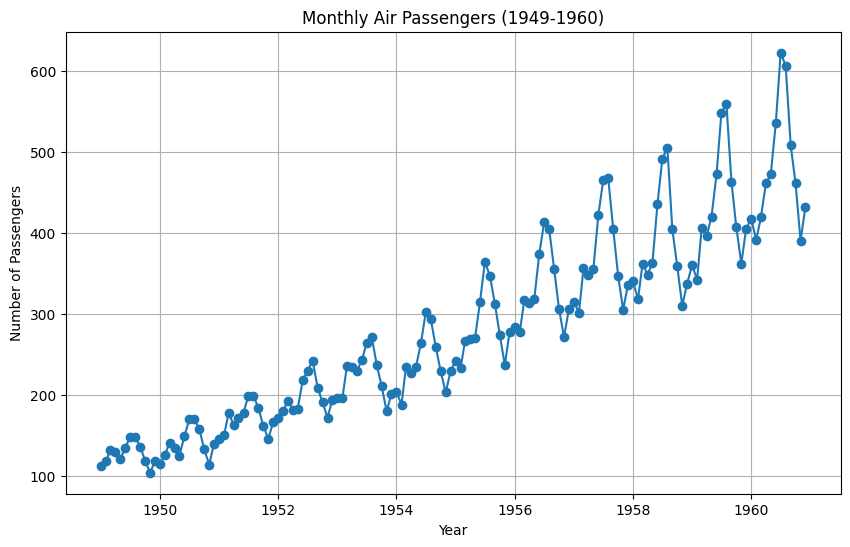

In [4]:
# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['passengers'], marker='o', linestyle='-')
plt.title('Monthly Air Passengers (1949-1960)')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

**Explanation:**

The plot shows a clear upward trend in the number of passengers over time.

There is also a repeating seasonal pattern (higher passengers during certain months).

**Step 5: Decompose the Time Series**

Decompose the time series into three components:

1.**Trend**: The long-term movement in the data.

2.**Seasonality**: The repeating short-term cycle.

3.**Residual**: The random noise in the data.

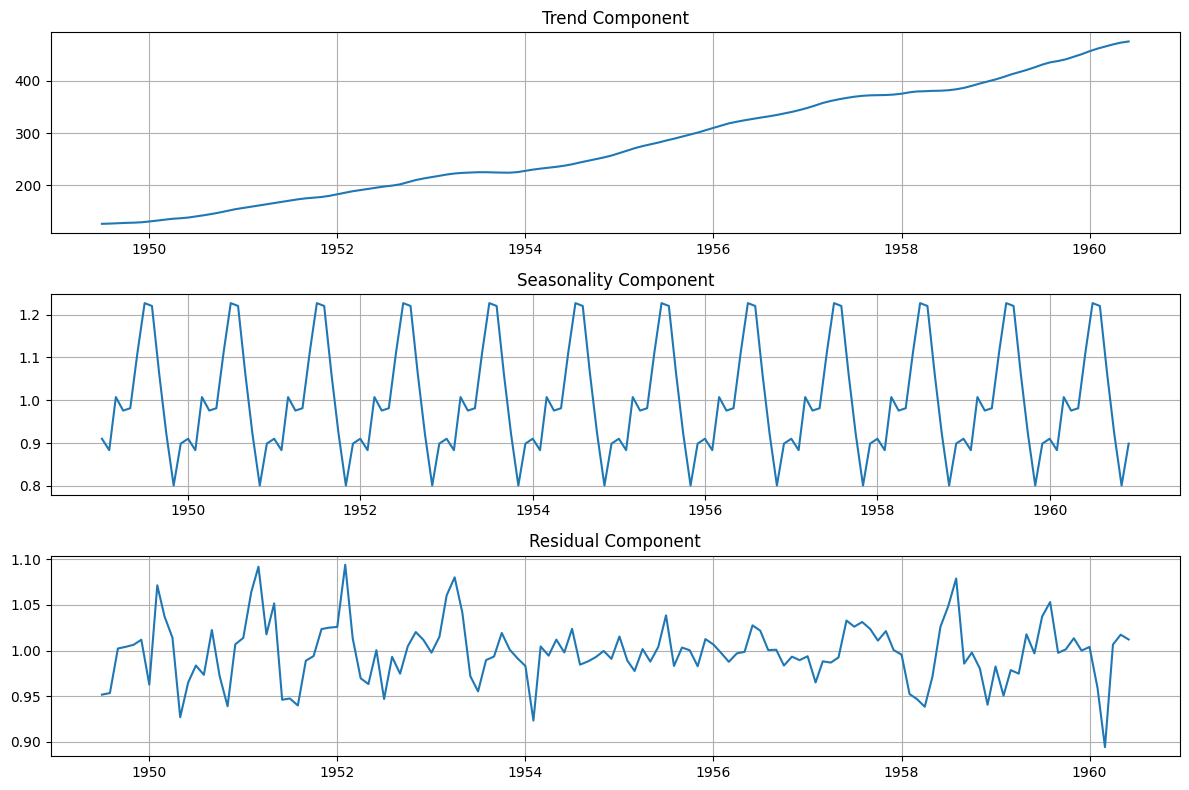

In [5]:
# Decompose the time series
decomposition = seasonal_decompose(data['passengers'], model='multiplicative')

# Plot the decomposed components
plt.figure(figsize=(12, 8))

# Trend
plt.subplot(3, 1, 1)
plt.plot(decomposition.trend)
plt.title('Trend Component')
plt.grid(True)

# Seasonality
plt.subplot(3, 1, 2)
plt.plot(decomposition.seasonal)
plt.title('Seasonality Component')
plt.grid(True)

# Residual
plt.subplot(3, 1, 3)
plt.plot(decomposition.resid)
plt.title('Residual Component')
plt.grid(True)

plt.tight_layout()
plt.show()

**Explanation:**


* The trend shows a steady increase in passengers over the years.

* The seasonality component reveals a consistent pattern (e.g., higher
  passengers during summer months).

* The residual component shows random fluctuations.

**Step 6: Analyze Seasonality**

Use a boxplot to analyze the seasonality by month.

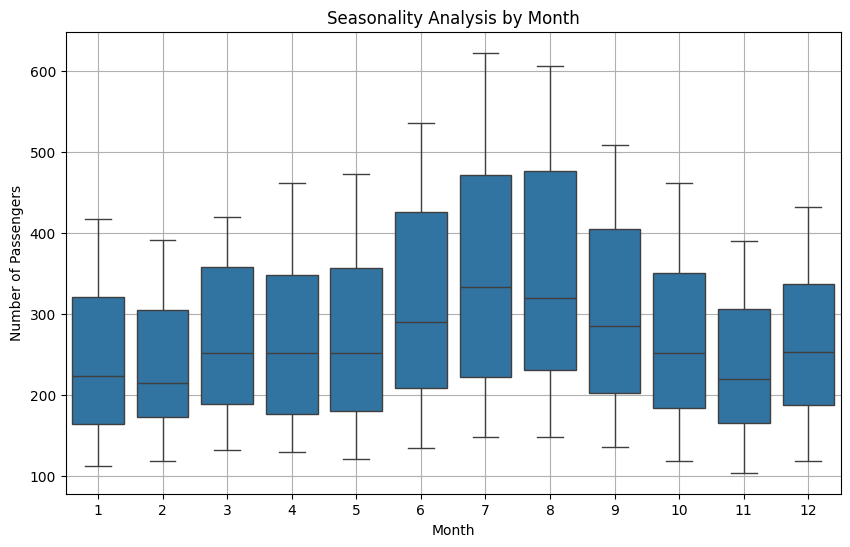

In [6]:
# Extract month from the index
data['month'] = data.index.month

# Plot a boxplot to analyze seasonality
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='passengers', data=data)
plt.title('Seasonality Analysis by Month')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

**Explanation:**

The boxplot shows that passenger numbers peak during the summer months (June, July, August) and dip during the winter months.

**Step 7: Analyze Yearly Trends**

Group the data by year and analyze the yearly trend.

<ipython-input-7-10275b640eaa>:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_data = data.resample('Y').mean()


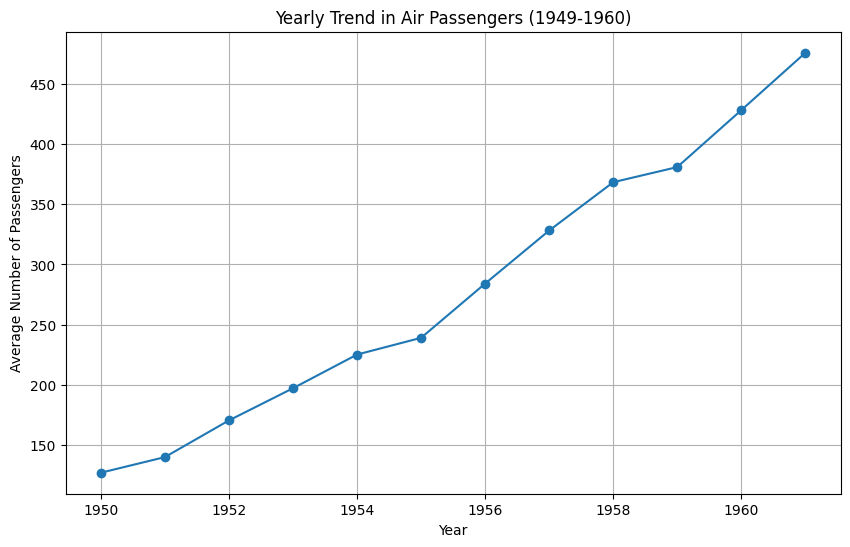

In [7]:
# Group by year and calculate the mean number of passengers
yearly_data = data.resample('Y').mean()

# Plot the yearly trend
plt.figure(figsize=(10, 6))
plt.plot(yearly_data.index, yearly_data['passengers'], marker='o', linestyle='-')
plt.title('Yearly Trend in Air Passengers (1949-1960)')
plt.xlabel('Year')
plt.ylabel('Average Number of Passengers')
plt.grid(True)
plt.show()

**Explanation:**

The yearly trend confirms a steady increase in the average number of passengers over the years.

***Conclusion***

* Trend: The number of air passengers has been steadily increasing from 1949 to 1960, indicating growth in air travel.

* Seasonality: There is a clear seasonal pattern, with passenger numbers peaking during the summer months and dipping during the winter months.

* Residuals: The residuals show random fluctuations, which could be due to external factors like economic conditions or global events.

# This analysis provides valuable insights into the patterns and trends in air travel data, which can be used for forecasting future passenger numbers or making strategic business decisions.

***This project demonstrates the power of data visualization and time series analysis in understanding trends and patterns in real-world datasets.***